## Project Task 1

## **UNEMPLOYMENT ANALYSIS WITH PYTHON**

**Problem Statement:**

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project.

**Dataset Details:**

The dataset provides insights into the unemployment scenario across different Indian states:

* States: The states within India.

* Date: The date when the unemployment rate was recorded.

* Measuring Frequency: The frequency at which measurements were taken (Monthly).

* Estimated Unemployment Rate (%): The percentage of individuals unemployed in each state of India.

* Estimated Employed Individuals: The count of people currently employed.

* Estimated Labour Participation Rate (%): The proportion of the working population (age group: 16-64 years) participating in the labor force, either employed or actively seeking employment.


This dataset aids in comprehending the unemployment dynamics across India's states during the COVID-19 crisis. It offers valuable insights into how the unemployment rate, employment figures, and labor participation rates have been impacted across different regions in the country. The analysis intends to shed light on the socio-economic consequences of the pandemic on India's workforce and labor market.

In [ ]:
# importing the necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**1. Load the Dataset into pandas dataframe**

In [ ]:
# Mount Drive and Read csv file
dfunemployment = pd.read_csv("/content/OASIS/Unemployment_Rate_upto_11_2020.csv")

# shows the datatype of dfunemployment
type(dfunemployment)

pandas.core.frame.DataFrame

In [ ]:
# Displays the first 5 records of the dataset
dfunemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
# Display information about the datatype of each column and null values
dfunemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
# Displays the shape of a DataFrame
dfunemployment.shape
# The DataFrame has a shape of (267, 9) , this implies that the DataFrame is made up of 267 rows and 9 columns of data.

(267, 9)

In [ ]:
# Checking for null values
dfunemployment.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [ ]:
# Display basic statistics about the data
dfunemployment.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


**2. Correlation Matrix**

* A correlation matrix is a table showing correlation coefficients between variables.
* Each cell in the table shows the correlation between two variables.
* The value is in the range of -1 to 1.

In [ ]:
# Compute the correlation matrix
# dfunemployment.corr()
dfunemployment.corr(numeric_only = True)

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
Estimated Unemployment Rate (%),1.000000,-0.245176,-0.073540,0.149976,-0.023976
Estimated Employed,-0.245176,1.000000,-0.047948,-0.113664,-0.119321
Estimated Labour Participation Rate (%),-0.073540,-0.047948,1.000000,0.080372,0.397836
longitude,0.149976,-0.113664,0.080372,1.000000,0.125895
latitude,-0.023976,-0.119321,0.397836,0.125895,1.000000


<Axes: >

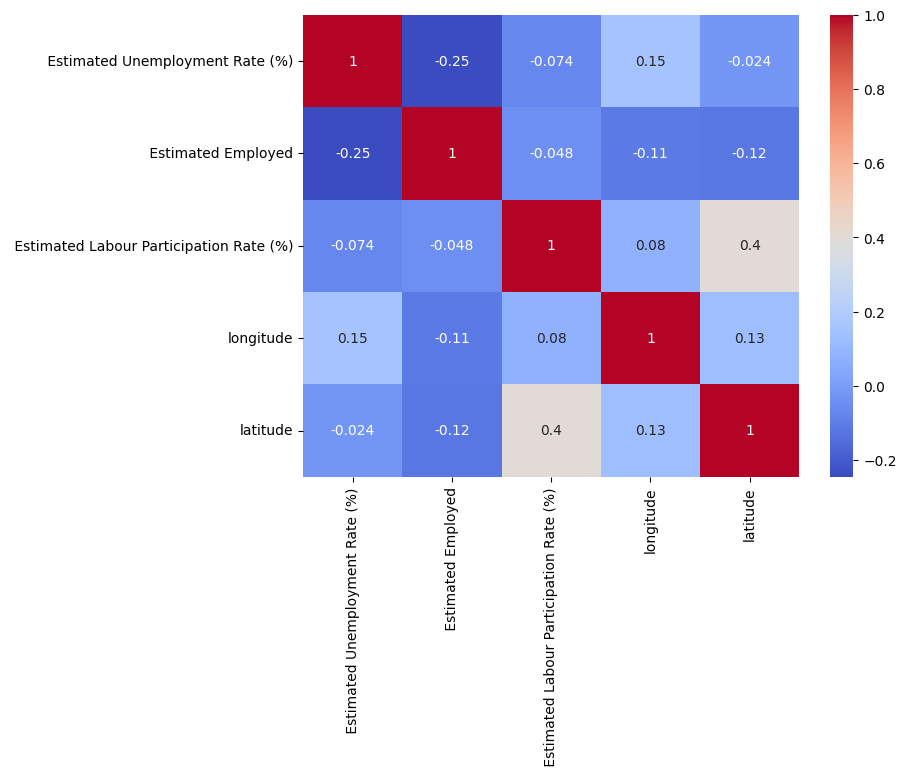

In [ ]:
# display the correlation matrix using a heatmap
corr = dfunemployment.corr(numeric_only = True)
fig, ax = plt.subplots(figsize=(8, 6))
# Compute the correlation matrix and plot it
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

**3. Exploratory data analysis (EDA)**

In [ ]:
# Renaming columns for better clarity of the data
dfunemployment.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "Longitude","Latitude"]

* Plotting the estimated no. of employees according to different regions of India

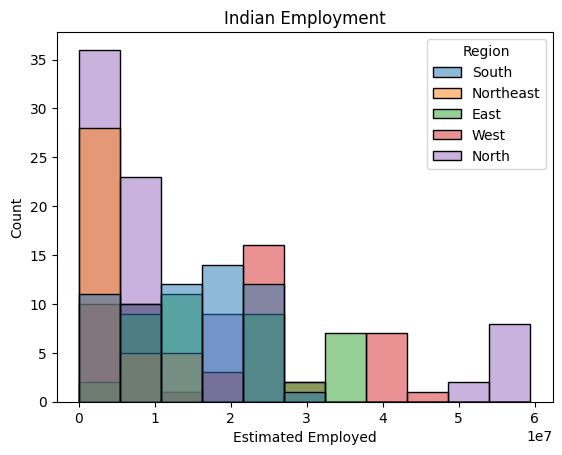

In [ ]:
# Plotting a histplot
plt.title("Indian Employment")
sns.histplot(x="Estimated Employed", hue="Region", data=dfunemployment)
plt.show()

* Plotting the unemployment rate according to different regions of India

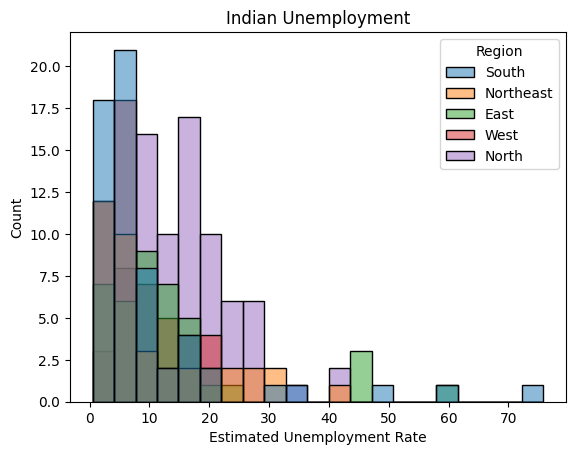

In [ ]:
# Plotting a histplot
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=dfunemployment)
plt.show()

Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force.

* Creating a dashboard to analyze the unemployment rate of each Indian state per region

In [ ]:
# Sunburst chart showing the unemployment rate in each Region and State

# Creating a DataFrame with relevant columns
unemploment = dfunemployment[["States", "Region", "Estimated Unemployment Rate"]]

# Creating a Sunburst chart
figure = px.sunburst(unemploment, path=["Region", "States"],
                     values="Estimated Unemployment Rate",
                     width=700, height=700, color_continuous_scale="rdylbu",
                     title="Unemployment Rate in India", template='presentation')
figure.show()

# Templates configuration
# Default template: 'plotly'
# Available templates:
# ['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark',
# 'presentation', 'xgridoff', 'ygridoff', 'gridon', 'none']

The northern regions of India seems to have more unemployed people.

**4. Impact of Lockdown on States Estimated Employed**


In [ ]:
# Formatting the columns and their datatypes
import calendar

# Converting 'Date' column to datetime format
dfunemployment['Date'] = pd.to_datetime(dfunemployment['Date'], dayfirst=True)

# Converting 'Frequency' and 'Region' columns to categorical data type
dfunemployment['Frequency'] = dfunemployment['Frequency'].astype('category')
dfunemployment['Region'] = dfunemployment['Region'].astype('category')

# Extracting month from 'Date' and creating a 'Month' column
dfunemployment['Month'] = dfunemployment['Date'].dt.month

# Converting 'Month' to integer format
dfunemployment['Month_int'] = dfunemployment['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
dfunemployment['Month_name'] = dfunemployment['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column
dfunemployment.drop(columns='Month', inplace=True)

dfunemployment.head()

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,Longitude,Latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74,4,Apr
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74,5,May


In [ ]:
# Filtering data for the period before the lockdown (January to April)
bf_lockdown = dfunemployment[(dfunemployment['Month_int'] >= 1) & (dfunemployment['Month_int'] <=4)]

# Filtering data for the lockdown period (April to July)
lockdown = dfunemployment[(dfunemployment['Month_int'] >= 4) & (dfunemployment['Month_int'] <=7)]

# Calculating the mean unemployment rate before lockdown by state
m_bf_lock = bf_lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by state
m_lock = lockdown.groupby('States')['Estimated Unemployment Rate'].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by state
m_lock['Unemployment Rate before lockdown'] = m_bf_lock['Estimated Unemployment Rate']

m_lock.columns = ['States','Unemployment Rate before lockdown','Unemployment Rate after lockdown']
m_lock.head()

,States,Unemployment Rate before lockdown,Unemployment Rate after lockdown
0,Andhra Pradesh,12.3975,9.4025
1,Assam,6.2450,6.2250
2,Bihar,30.8025,20.7425
3,Chhattisgarh,9.6025,7.2450
4,Delhi,24.3600,17.6975


In [ ]:
# percentage change in unemployment rate
m_lock['Percentage change in Unemployment'] = round(m_lock['Unemployment Rate after lockdown'] - m_lock['Unemployment Rate before lockdown']/m_lock['Unemployment Rate before lockdown'],2)
plot_per = m_lock.sort_values('Percentage change in Unemployment')


# percentage change in unemployment after lockdown
fig = px.bar(plot_per, x='States',y='Percentage change in Unemployment',color='Percentage change in Unemployment',
            title='Percentage change in Unemployment in each state after lockdown')
fig.show()

The most affected states/territories in India during the lockdown in case of unemployment were:

* Tripura
* Haryana
* Bihar
* Puducherry
* Jharkhand
* Jammu & Kashmir
* Delhi